# Notebook 2: Japanese-American Detainment During World War II

Executive Order 9066 was signed and issued by President Franklin Roosevelt on February 19, 1942. This order gave the U.S. army authorization to evacuate any individual considered a threat to national security from designated military exclusion zones along the West Coast to internment camps further inland. The passing of this executive order began the process of funneling Japanese-Americans into intermediate assembly centers and finally permanent internment centers. 

By working through this notebook, you will be able to visualize the forced movement of Japanese-Americans, from the West Coast of the United States, to scattered detainment camps, and eventually to cities throughout the country.

### Learning Outcomes
After completing this notebook, you will learn about:
- The displacement of Japanese-Americans before and after detainment
- Basic data cleaning and exploratory data analysis
- Recognizing how data can restrict the types of analysis we can perform
- Using different visualizations to discover traits about our data

---

### Table of Contents
1. [Section 1: The Data Science Lifecycle](#dslifecycle)
2. [Section 2: The Data](#data)
3. [Section 3: Data Exploration and Visualization](#eda)
4. [Section 4: Assembly Centers and Internment Centers](#section4)
5. [Section 5: Mapping and Movement](#section5)

**Dependencies**

In [3]:
# Run this cell!
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

relocations_cities = pd.read_csv("data/RelocationDestinations_Cities_LL.csv", error_bad_lines = False)

---

## Section 1: The Data Science Lifecycle<a id='dslifecycle'></a>


In data science, we utilize large and diverse datasets to make conclusions and predictions about the world we live in. Doing so involves a process called the data science lifecycle, which is a high-level description of the stages of work that data scientists perform as they work on a data science project. There are a number of data science lifecycles that people have developed and use to learn and practice data science. The lifecycle that we will be working with in DATA-4AC is a newly updated lifecycle that considers the human contexts and ethics of data at every stage. 


<img src="images/dsethoslifecycle.png" width="450">

This process is often iterated as new questions and problems emerge after the last step that enable data practitioners  to learn more about the characteristics and patterns of the world, which in turn informs the kinds of questions that are asked.

In this notebook, we'll focus on stages 2 and 3. We'll first introduce the data sets used in this notebook and then take a deeper look into the data through exploratory data analysis (EDA). We perform EDA to uncover any patterns or features from the data and better understand the underlying structure. EDA can involve looking for outliers or anomalies, identifying important variables, and data visualization. 

----

## Section 2: Data Discovery - What is our data? Where does it come from? What is in it? <a id='data'></a>


We will be working with a dataset that was manually digitized from tables in 
*The Evacuated People: A Quantitative Description*, a report published by the War 
Relocation Authority (WRA) in 1946. The WRA was the government agency that oversaw the 
forced relocation of Japanese-Americans and was first established via Executive Order 9102 
on March 18, 1942.  *The Evacuated People* contains statistics and more than 100 tables 
concerning the 120,313 Japanese Americans that were under the authority of the WRA. The WRA created the data as part of and in order to pursue its "program" of detaining Japanese-Americans.


The tables in this report were transcribed  manually because the results from automatic scraping (using a computer program to extract the data) contained too many errors  (a person named [Cooper Thomas created the dataset](https://data.world/infinitecoop/japanese-internment-camps/) we will be using). Thus, there may still be some human error. The datasets include the populations of each camp by month, the relocation destinations of those who were incarcerated, and the Japanese-American population in the United States before and during the war. Take a look at the full dataset [here](https://data.world/infinitecoop/japanese-internment-camps/).

The second dataset we're working with is from the story map "Behind Barbed Wire," created by the Library of Congress. The data comes from newspapers that were produced by Japanese-American detainees while they lived in the camps. Camp newspapers circulated administrative announcements, events, vital statistics, news from other camps, and other information about daily camp life. They also included [comics](https://www.loc.gov/resource/sn84024049/1942-11-18/ed-1/?sp=7), opinion pieces, job opportunities, and even results from baseball games. These newspapers helped maintain a sense of normalcy for their detained authors and readers, something that the WRA tables do not reflect. You can access the data and read about the newspapers [here](https://tinyurl.com/y4g5kq77). 
Note that this dataset provides similar data, though not at the same scope as the data from the WRA report - we will discuss more in section 3. Data scientists will often use multiple data sets, combine them, analyze both in parallel, etc.

**Question 2a:** Considering the context in which a dataset was produced is critical to beginning to make sense of the human contexts and ethics of a data science project. In this notebook, we are using two datasets with very different contexts for our analysis. Take a moment to review the contexts of the two datasets. Who created each? What was the purpose for the creation of each? How was each dataset used? By whom? How might this context bear upon the data categories and values in each dataset? 

Hint: You can consider issues like comprehensibility or accuracy.

**Answer:** YOUR ANSWER HERE


<img src="images/Posted_Japanese_American_Exclusion_Order.png" width="450">
<center> This image is available from the United States Library of Congress's Prints and Photographs division.

Below, we are loading in two datasets and doing a bit of data cleaning. The first dataset is from the manually transcribed WRA tables of the camp populations from each month and we are converting the data type of the `date` column into something easier for us to work with. The second dataset is from "Behind Barbed Wire" concerning the location of each internment camp and its maximum population. The maximum population is tweaked to change it to a number rather than a string.

In [4]:
pop_by_month = pd.read_csv("data/CampPopulationsByMonth.csv", error_bad_lines = False, thousands = ',')
pop_by_month['Date']= pd.to_datetime(pop_by_month['Date']) 

camps = pd.read_csv('data/BehindBarbedWire_StoryMap_InternmentCampLocationsMap_Data.csv', error_bad_lines = False)
camps["Maximum Population"] = camps["Maximum Population"].str.replace(',', '')
camps['Maximum Population'] = camps['Maximum Population'].astype(float)

We'll first look at the `pop_by_month` table, which has the population of each of the ten camps at the start of every month.

In [5]:
pop_by_month.head()

,Date,Total,Topaz/Central Utah,Poston/Colorado River,Gila River,Granada,Heart Mountain,Jerome,Manzanar,Minidoka,Rohwer,Tule Lake
0,1942-06-01,17393,0,7281,0,0,0,0,9666,0,0,446
1,1942-07-01,27633,0,8755,0,0,0,0,9840,0,0,9038
2,1942-08-01,40316,0,13262,2106,0,0,0,9928,0,0,15020
3,1942-09-01,63031,0,17818,9150,212,5758,0,10072,4840,0,15181
4,1942-10-01,90499,5806,17847,11555,7480,10813,0,10256,9200,2265,15277


The `camps` table from "Behind Barbed Wire" contains the information on the internment camp's, name, city location, state location, latitude, longitude, opening date, closing date, and their maximum populations.

In [6]:
camps

,Internment Camp Name,Location,State,Latitude,Longitude,Opened,Closed,Maximum Population
0,Gila River Relocation Center,Rivers,Arizona,33.065083,-111.830528,20-Jul-42,16-Nov-45,13348.0
1,Poston Relocation Center,Parker,Arizona,33.987500,-114.401111,2-Jun-42,28-Nov-45,17814.0
2,Jerome Relocation Center,Denson,Arkansas,33.411667,-91.461111,6-Oct-42,30-Jun-44,8497.0
3,Rohwer Relocation Center,McGehee,Arkansas,33.766297,-91.280158,18-Sep-42,30-Nov-45,8475.0
4,Manzanar Relocation Center,Manzanar,California,36.728333,-118.154444,2-Jun-42,21-Nov-45,10046.0
5,Tule Lake Relocation Center,Newell,California,41.889444,-121.374722,27-May-42,20-Mar-46,18789.0
6,Granada Relocation Center,Amache,Colorado,38.049444,-102.328611,27-Aug-42,15-Oct-45,7318.0
7,Minidoka Relocation Center,Hunt,Idaho,42.679000,-114.244000,10-Aug-42,28-Oct-45,9397.0
8,Topaz Relocation Center,Topaz,Utah,39.418336,-112.708750,11-Sep-42,31-Oct-45,8130.0
9,Heart Mountain Relocation Center,Heart Mountain,Wyoming,44.671667,-108.946389,12-Aug-42,10-Nov-45,343.0


The `assembly` table from "Behind Barbed Wire" contains the locations of each assembly center (city, state, latitude, and longitude), as well as the number of people that were processed through each one.

In [ ]:
assembly = pd.read_csv('data/BehindBarbedWire_StoryMap_AssemblyCentersMap_Data.csv', error_bad_lines = False)
assembly = assembly.dropna(subset=['Latitude', 'Longitude']).dropna(axis = 1)
assembly['Number of People'] = assembly['Number of People'].astype(float)
assembly

The `population1940_1945` table contains a list of counties that Japanese Americans lived in in 1940 and 1945, collected by the WRA. An additional column calculates the percent that returned to the county that they were from.

In [ ]:
population1940_1945 = pd.read_csv("data/JapaneseAmericanPopulation_1940_1945_LL.csv", error_bad_lines = False)
population1940_1945.head(10) # If you'd like to take a look at the entire dataset, add a # before the .

----
## Section 3: Exploratory Data Analysis<a id='eda'></a>

Now that we've obtained our data, we can try to find interesting properties of our datasets and make visualizations to ultimately understand our data better and the stories behind the data. Keep in mind the *granularity* of our datasets, i.e. the level of detail the data describes (how fine or coarse-grained is it?). The data we're working with is at the "camp" level and thus aren't looking further into the specific populations of Japanese Americans at these internment camps (for example, looking into the number of people who were employed by or studying within the UC system at the Tule Lake camp, or people with certain health conditions in each camp).


**Question 3a:** What kinds of events, trends, or patterns might we be able to observe from data at this particular granularity?




**Answer:** YOUR ANSWER HERE

Sometimes numbers don't always add up. We have two separate tables with data about the internment camps; one by the WRA and one with numbers reported in the newspapers from each camp. Say we try to compare the maximum population of the Manzanar camps from both tables.

In [ ]:
print('Maximum Population at Manzanar')
pop_by_month_max = pop_by_month['Manzanar'].max()
print('Population by Month Data (WRA):' ,  pop_by_month_max)

camps_max = int(camps[camps['Internment Camp Name'] == 'Manzanar Relocation Center']['Maximum Population'])
print('Camps Data (BBW):',  camps_max)

We see that the two numbers don't match up. The `pop_by_month` table says that the maximum population of Manzanar was 10,256, while the camps table says that the maximum was 10,046 people. While this isn't a huge difference, it's important to remember that there can be inconsistency of values among your datasets, and not to take any one dataset as complete and accurate. 

**Question 3b:** What factors might contribute to this inconsistency?

**Answer:** YOUR ANSWER HERE

Below, we create barplots to  compare the populations at each camp given by the two different data sets `pop_by_month` and `camps`. Selecting a camp in the dropdown menu will update the barplot and display the maximum populations reported from each dataset.

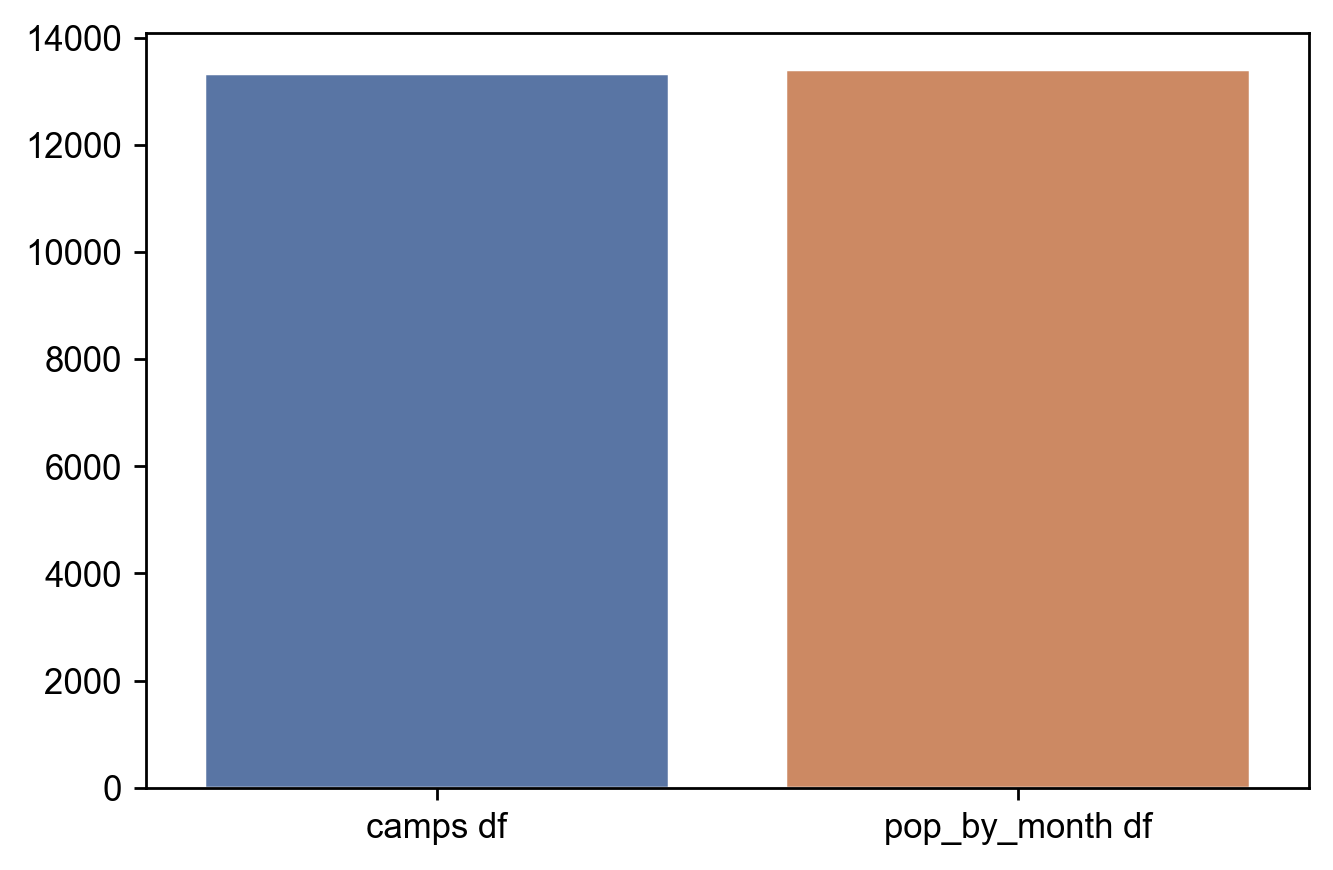

In [8]:
location_dict = {'Topaz Relocation Center':'Topaz/Central Utah', 
                 'Poston Relocation Center':'Poston/Colorado River',
                 'Gila River Relocation Center':'Gila River', 
                 'Granada Relocation Center': 'Granada', 
                 'Heart Mountain Relocation Center':'Heart Mountain', 
                 'Jerome Relocation Center':'Jerome', 
                 'Manzanar Relocation Center':'Manzanar',
                 'Minidoka Relocation Center':'Minidoka', 
                 'Rohwer Relocation Center':'Rohwer', 
                 'Tule Lake Relocation Center':'Tule Lake'} 
def pop_diff(location):
    plt.subplots(dpi=250)
    sns.set(font_scale=.8)
    pbm_max = pop_by_month[location_dict[location]].max()
    camps_max = camps[camps['Internment Camp Name'] == location]['Maximum Population'][0]
    bar = sns.barplot(x =['camps df', 'pop_by_month df'], y=[camps_max, pbm_max]);
    
Location = interact(pop_diff, location=camps['Internment Camp Name'].values);

**Question 3c:** Consider the visualization above. Identify a flaw (if any) and give a recommendation on how to improve it. Is there another type of visualization you can think of that can portray the differences in population?

**Answer:** YOUR ANSWER HERE

Next, we'll visualize the monthly population change of each camp using an overlaid line plot. Using an overlaid line plot can make it easier to identify any relationships that may exist in the data, and more generally if any events coincide with the population of each camp reported by the WRA.

In [9]:
pop_by_month2 = pop_by_month.drop("Total", axis = 1)
melted = pd.melt(pop_by_month2, id_vars = ["Date"], value_vars = pop_by_month2.columns[1:], var_name = 'Camp', value_name = "Population")
fig = px.line(melted, x = 'Date', y = 'Population', color = 'Camp', title = 'Camp Populations by Month')
fig.show();

**Question 3d:** What is happening to the camp populations in the line plot above? Do any camps stand out to you? What do you notice about the increases in population?

**Answer:** YOUR ANSWER HERE

The camp with the steadily increasing population after 1943 is Tule Lake, the largest detainment camp. On July 15, 1943, Tule Lake was designated as the segregation center because of its capacity and the number of individuals who were deemed "disloyal" by the WRA (the loyalty of detainees was conflated with their dissatisfaction with their treatment). Martial law was declared on November 14 at Tule Lake and it became a maximum-security, militarized center, with a curfew in place and almost all daily activities were brought to an end. 

As the segregation center, Tule Lake transferred "loyal" inmates to other WRA camps in exchange for "disloyal" inmates from other camps, though not all "loyals" wanted to leave. Overcrowding was a serious issue at Tule Lake: additional barracks were constructed for the 1,800 incoming inmates from Manzanar in early spring 1944, and even more arrived from other camps later that spring. Midway through 1944, the WRA stopped transferring detained Japanese-Americans to Tule Lake. (Can you see these changes reflected in the plot above?)

Now we'll shift our focus from detention camp populations to the percentages of Japanese-Americans detained that returned to their original county. We can use a histogram to visualize the distribution of the percentages reported.

In [ ]:
sns.distplot(population1940_1945['% returned'])
plt.title("Percent Returned to Original County");

We can see that the bin that indicated 0% return to original location hold the most weight. This indicates that a vast majority of the individuals that were held in detention camps did not return to the location where they originally lived.

**Question 3e**: Visualizations allow us to picture how the numbers change and find abnormalities in the data set. What are some abnormalities that you see in the first plot? What are some possible explanations for these abnormalities?


**Answer:** YOUR ANSWER HERE

---

## Section 4: Assembly Centers and Internment Centers<a id='#section4'></a>

In this section we will look at the trends in the relocation of detained Japanese-Americans. The maps below show how far people were forced to move from one location to another over the course of WWII. By creating a map from longitude and latitude data, we can better visualize locations and understand some aspects of Japanese-American detainments, such as on whose land Japanese-Americans were held in and the conditions that they suffered, and the places that Japanese-Americans across the West Coast came from and where they went afterwards.

When a notice of "evacuation" was posted, families had to register at a control center and were issued a number, stripping families of their privacy and dignity. From there, families awaited their trip to the assembly centers and upon arrival, detainees recall two vivid images: "walking to the camp between a cordon of armed guards, and first seeing the barbed wire and searchlights, the menacing symbols of a prison" (*Personal Justice Denied*, 136).


<img src="images/Luggage_Japanese_American_internment.png" width="400">

<center> The luggage of the Japanese Americans who have arrived at a reception center.
This image is available from the United States Library of Congress's Prints and Photographs division.

### Assembly Centers
Japanese Americans were uprooted from their homes and transported from assembly centers to detention camps all across the country. Assembly centers served as temporary detention centers for the detained to stop at before being transported to a permanent detention center. The map below displays the geological location of the assembly centers created after the passing of the Executive Order 9066.

To zoom in and out on the map, press the + and - buttons or scroll up and down. Also, click on the blue marker to see the assembly center name. 

In [ ]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(assembly)):
    folium.Marker(
      location=(assembly.iloc[i]['Latitude'], assembly.iloc[i]['Longitude']),
      popup=assembly.iloc[i]['Location'],
      ).add_to(m)
m

### Detention Camps

The map below shows the location of detention centers across the country. Notice that the detention centers are located further inland than assembly centers. This is because a majority of the Japanese-Americans that were held in detention camps were originally from the West Coast. After the order passed, these Japanese-Americans were relocated to nearby assembly centers as authorities prepared to relocate them to further detention centers.

In [ ]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(camps)):
    folium.Marker(
      location=(camps.iloc[i]['Latitude'], camps.iloc[i]['Longitude']),
      popup=camps.iloc[i]['Internment Camp Name'],
      ).add_to(m)
m

---

## Section 5: Mapping and Movement<a id='section5'></a>

The abrupt forced relocation of countless Japanese-Americans during World War II resulted in a lasting change in the location of many of these Japanese-American families even after the war ended. During the relocation process many families were forced to quickly sell their possessions, businesses and land holdings. Those who did not, often came back to find their possessions gone and homes vandalized. As a result, many detainees that lived on the West Coast of the United States did not return to their previous homes after the war.

<img src="images/Hayward_Friends_say_goodbye.png" width="400">
<center> Neighbors in Hayward, California saying goodbye.
    
<center> This image is available from the United States Library of Congress's Prints and Photographs division.
    

### Location of Detainees Before Relocation

The map below shows the population of each county at the start of World War II in 1940, just before the Executive Order 9066 in 1942. Japanese Americans were largely concentrated on the West Coast, with the largest population in Los Angeles.


In [ ]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(population1940_1945)):
    folium.Circle(
      location = (population1940_1945.iloc[i]['Latitude'], population1940_1945.iloc[i]['Longitude']),
      popup = population1940_1945.iloc[i]['County'],
      radius = float(population1940_1945.iloc[i]['1940']) *12,
      color = 'blue',
      fill = True,
      fill_color = 'crimson').add_to(m)
m

In [ ]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'

def color(pop): 
    if pop in range(0,1000): 
        col = 'green'
    elif pop in range(1001,4999): 
        col = 'blue'
    elif pop in range(5000,10000): 
        col = 'orange'
    else: 
        col='red'
    return col 

population1940_1945['marker_color'] = [color(pop) for pop in population1940_1945['1940'].tolist()]

for i in range(0,len(population1940_1945)):
    folium.CircleMarker(
        location = (population1940_1945.iloc[i]['Latitude'], population1940_1945.iloc[i]['Longitude']),
        radius = 1,
        popup = population1940_1945.iloc[i]['County'],
        color = population1940_1945.iloc[i]['marker_color'],
    ).add_to(m)
m



**Question 5a**:  The two visualizations above map the same data, but do so in two different ways. What are the differences between the two maps? What does each visualization draw attention to and what does it obscure?

**Answer:** YOUR ANSWER HERE 

*Potential Answer: The first map indicates population by size of the circle where as the second map indicates by color. A disadvantage of the first map is that the circles begin to overlap and cloud the overall view of the map. An advantage of the first map is that it is very easy to tell where large populations lie on the map. A disadvantage of the second map is that one must consult the legend to understand what the map is displaying. An advantage of the second map is that each marker is clearly visible and they do not overlap.*

### Location of Detainees After the War

This table shows the number of Japanese Americans in each county after the war. This data was self-reported by evacuees.

In [ ]:
reloc_cities = pd.read_csv('data/RelocationDestinations_Cities_LL.csv', error_bad_lines = False)
reloc_cities['People'] = reloc_cities['People'].astype(float)
reloc_cities.head()

This table shows the number of Japanese-Americans in each county after the war. This data was self-reported by detainees.
This map shows the cities that people relocated after the war. It allows us to visualize the extent people had to relocate from their original homes. We can see that a large population moved to the midwest (Chicago area) as well as the East Coast, Canada, and even Mexico City.


In [ ]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(reloc_cities)):
    folium.Circle(
      location=(reloc_cities.iloc[i]['Latitude'], reloc_cities.iloc[i]['Longitude']),
      popup=reloc_cities.iloc[i]['City'],
      radius=reloc_cities.iloc[i]['People'] * 12,
      color='blue',
      fill=True,
      fill_color='red').add_to(m)
m

**Question 5b**: As was mentioned above, this data is self reported by detainees. What effect does the fact that the data is self-reported have on the data collected and the conclusions made? 

**Answer:** YOUR ANSWER HERE

*Potential Answer: The fact that the data is self reported indicates that the data might have an underlying bias due to the people who chose to report and those who did not. The data might not be representative of all the evacuees.*

**Question 5c:** Given our work with the data and the context surrounding it (question 2a), what does it mean to be doing data analysis on these two datasets together? How is the context transformed through the act of your analysis?  

**Answer:** YOUR ANSWER HERE

---
